# Solving Online Advertising Problem with A/B Testing

## Introduction

In this Jupyter notebook, we explore the use of A/B testing to solve the online advertising problem. Online advertising involves making decisions on which ads to display to users to maximize click-through rates (CTR) or other performance metrics. A/B testing is a powerful statistical technique commonly used to compare and evaluate different advertising strategies in a controlled and data-driven manner.

## What is A/B Testing?

A/B testing, also known as split testing, is a method of comparing two or more variations of an ad (or any other intervention) to determine which one performs better. It is an experiment where users are randomly assigned to different groups, each exposed to a different version of the ad. By analyzing the performance metrics of these groups, we can make data-driven decisions about which ad variation yields better results.

## Implementation

In this notebook, we will create a simplified version of A/B testing for online advertising using the concept of Bernoulli Bandits. We will simulate different ad variations (A, B, C, etc.), each with its own click-through probability. The goal is to identify which ad variation has the highest click-through rate and, consequently, should be chosen for wider deployment.

## Create Environment

This code simulates an environment for online advertising using the concept of Bernoulli Bandits. In online advertising, companies often need to decide which ad to display to users in real-time to maximize their click-through rates (CTR) or other performance metrics. The Bernoulli Bandit model is a simplified framework that represents this problem.

### Code Description

#### Constructor:
- The `BernoulliBandit` class has a constructor `__init__(self, p)` that takes a single parameter `p`.
- The parameter `p` represents the probability of a user clicking on the ad when it is displayed. It is a value between 0 and 1.

#### Method: `display_ad()`
- The `display_ad()` method simulates displaying the ad to a user and returns the outcome of the ad display as a binary value (0 or 1).
- It uses the `numpy.random.binomial(n=1, p=self.p)` function to model the Bernoulli distribution with a single trial (n=1).
- The parameter `p` determines the probability of success (click) for the Bernoulli distribution.

In [2]:
import numpy as np

class BernoulliBandit(object):
    def __init__(self, p):
        self.p = p

    def display_ad(self):
        reward = np.random.binomial(n=1, p=self.p)
        return reward

In this code, five different ads (`adA`, `adB`, `adC`, `adD`, and `adE`) are created as instances of the `BernoulliBandit` class, each with its own click-through probability (`p`). These probabilities represent how likely a user is to click on the respective ad when displayed.

The `ads` list contains all the ad instances, allowing for easy management and comparison of different ads.

In [3]:
adA = BernoulliBandit(0.004)
adB = BernoulliBandit(0.016)
adC = BernoulliBandit(0.02)
adD = BernoulliBandit(0.028)
adE = BernoulliBandit(0.031)
ads = [adA, adB, adC, adD, adE]

In the context of online advertising, each ad instance in the ads list represents a different ad creative that the company wants to test. The goal is to determine which ad has the highest click-through rate (CTR) or conversion rate.

To simulate the online advertising process, the company can use the display_ad() method of each ad instance to obtain a reward (0 or 1) based on the Bernoulli distribution with the corresponding click-through probability. The company can then analyze the rewards obtained for each ad and use the results to make informed decisions about which ad(s) to display more frequently to maximize their overall performance.

## A/B/n Testing for Online Advertising Performance

In this section of the Jupyter notebook, we conduct an A/B/n test to compare the performance of different ad variations in online advertising. The goal is to identify the best performing ad variation among the given options (A, B, C, etc.) and optimize the overall click-through rate (CTR).

### Experiment Setup
We start by defining the parameters for the A/B/n test:

- `n_test`: The number of test impressions or trials. In this experiment, we simulate 10,000 test impressions.
- `n_prod`: The number of additional production impressions or trials. This simulates 90,000 additional impressions after the test phase.
- `n_ads`: The total number of ad variations to be tested. The length of the `ads` list corresponds to the number of ad variations.

### A/B/n Testing Algorithm

#### Initialization

- We create two arrays: `Q` for tracking the action values (expected rewards) of each ad variation, and `N` for tracking the total impressions of each ad variation. Both arrays are initialized with zeros.
- `total_reward` is initialized to zero, representing the cumulative reward obtained from all impressions.
- An empty list `avg_rewards` is created to store the average reward obtained at each impression.

In [4]:
n_test = 10000
n_prod = 90000
n_ads = len(ads)
Q = np.zeros(n_ads) # Q action values
N = np.zeros(n_ads) # N total impressions
total_reward = 0
avg_rewards = [] # Save average rewards over time

### A/B/n Testing Loop

- For each test impression (out of `n_test` impressions), we randomly choose an ad variation to display to a user.
- We observe the reward (`R`) obtained from the chosen ad variation using the `display_ad()` method of the corresponding `BernoulliBandit` instance.
- The total impressions (`N`) of the chosen ad variation are updated, and its action value (`Q`) is updated using the incremental update rule for sample averages.
- The total reward is incremented by the observed reward (`R`).
- The average reward obtained so far (`avg_reward_so_far`) is calculated for this iteration and added to the `avg_rewards` list.

In [5]:
for i in range(n_test):
    ad_chosen = np.random.randint(n_ads)
    R = ads[ad_chosen].display_ad() # Observer reward
    N[ad_chosen] += 1
    Q[ad_chosen] += (1 / N[ad_chosen]) * (R - Q[ad_chosen])
    total_reward += R
    avg_reward_so_far = total_reward / (i + 1)
    avg_rewards.append(avg_reward_so_far)

### Determining the Best Performing Ad

- After the A/B/n test phase, we identify the ad variation with the highest action value (`Q`) and consider it as the best performing ad. The index of this ad in the `ads` list (`best_ad_index`) corresponds to the best ad variation.

In [6]:
best_ad_index = np.argmax(Q)

In [7]:
print("The best performing ad is {}".format(chr(ord('A') + best_ad_index)))

The best performing ad is E


### Production Phase

- In the production phase, we simulate an additional `n_prod` impressions using the best performing ad variation determined from the A/B/n test.
- We again observe the reward from the chosen ad variation and update the total reward and the average reward obtained so far.

In [8]:
ad_chosen = best_ad_index
for i in range(n_prod):
    R = ads[ad_chosen].display_ad()
    total_reward += R
    avg_reward_so_far = total_reward / (n_test + i + 1)
    avg_rewards.append(avg_reward_so_far)

### Visualizing the Results
- The average rewards obtained over time (both during the A/B/n test phase and the production phase) are stored in a DataFrame (`df_reward_comparison`) and plotted using the `plotly` library. The plot displays how the average reward changes as more impressions are made.

In [11]:
import pandas as pd

df_reward_comparison = pd.DataFrame(avg_rewards, columns=['A/B/n'])

In [12]:
import cufflinks as cf
import plotly.offline

cf.go_offline()
cf.set_config_file(world_readable=True, theme="white")
df_reward_comparison['A/B/n'].iplot(title="A/B/n Test Avg. Reward: {:.4f}".format(avg_reward_so_far),
                                    xTitle='Impressions',
                                    yTitle='Avg Reward')

Run using matploylib bellow if cufflinks not show

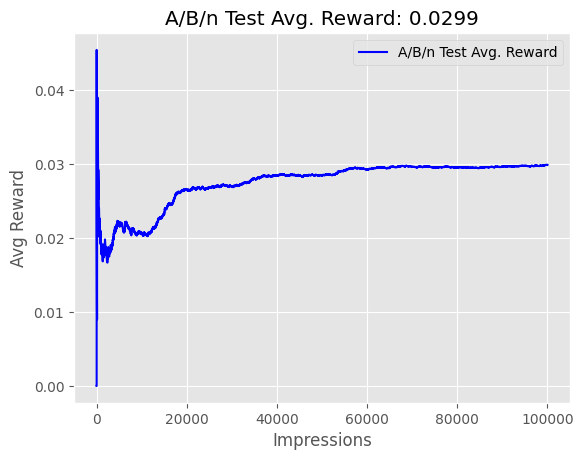

In [13]:
import matplotlib.pyplot as plt

# Set the style for matplotlib plots (optional)
plt.style.use('ggplot')

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the average rewards over time using matplotlib
ax.plot(df_reward_comparison.index, df_reward_comparison['A/B/n'], label="A/B/n Test Avg. Reward", color='blue')

# Set plot title and axis labels
ax.set_title("A/B/n Test Avg. Reward: {:.4f}".format(avg_reward_so_far))
ax.set_xlabel('Impressions')
ax.set_ylabel('Avg Reward')
ax.legend()
plt.show()

The A/B/n testing algorithm allows us to efficiently compare multiple ad variations, identify the best-performing ad, and deploy it in production to maximize the overall click-through rate or other performance metrics for online advertising campaigns. The plot helps visualize the progress and the impact of the selected ad variation over the course of the experiment and the production phase.